In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ML2_lib import loss
from ML2_lib import DC_SGD

from sklearn.datasets import load_boston,load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# 学習率は0.01/t * sqrt(d) ノイズは正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()

In [3]:
hoge = DC_SGD.DCSGD(loss_type=son,lr=0.01,c=c,fixed_lr=True)
fuga = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="lognormal",loss_type=son,c=c,fixed_lr=True)

In [4]:
k = 20
x,y = fuga.generate_dataset()
w , _ = hoge.learn(k=k,w_init=w_init,x=x,y=y)

  0%|          | 0/2 [00:00<?, ?it/s]

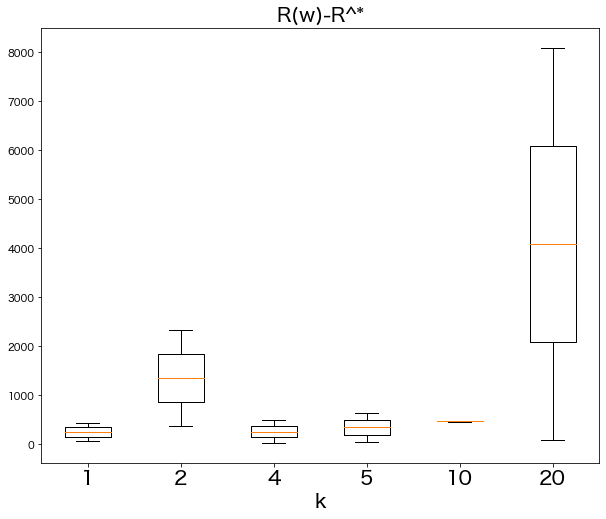

In [5]:
_, result_loss_gauss = fuga.many_trails(trial_num=2,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()

In [6]:
df = pd.DataFrame(result_loss_gauss[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,248.677310,1352.977390,255.626411,343.981395,470.870981,4091.613629
std,265.212695,1383.300633,326.605350,429.223419,12.967512,5665.946665
min,61.143615,374.836132,24.681554,40.474605,461.701565,85.184320
25%,154.910462,863.906761,140.153983,192.228000,466.286273,2088.398975
50%,248.677310,1352.977390,255.626411,343.981395,470.870981,4091.613629
75%,342.444158,1842.048019,371.098840,495.734791,475.455688,6094.828283
max,436.211005,2331.118648,486.571269,647.488186,480.040396,8098.042938


In [7]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,342.444158,1842.048019,371.098840,495.734791,475.455688,6094.828283
0.80,361.197527,1939.862145,394.193326,526.085470,476.372630,6495.471214
0.90,398.704266,2135.490397,440.382298,586.786828,478.206513,7296.757076
0.95,417.457636,2233.304522,463.476783,617.137507,479.123455,7697.400007
0.99,432.460332,2311.555823,481.952372,641.418050,479.857008,8017.914352


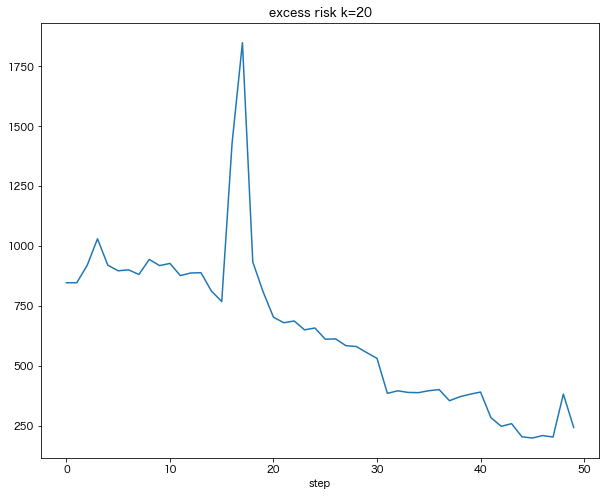

In [8]:
_,loss_transition = fuga.transition(k=k,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

In [9]:
# real_data = load_boston()
real_data = load_diabetes()

In [10]:
x = real_data.data
# x = x.T
x.shape


(442, 10)

In [11]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x = np.c_[x,np.ones(x.shape[0])]
w_init = np.zeros(x.shape[1]).reshape(1,-1)

In [12]:
y = real_data.target.reshape(1,-1)
y = y.T
y.shape

(442, 1)

In [13]:
# データセットを分割する関数の読み込み


# 訓練用データセットとテスト用データセットへの分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

son = loss.LinearQuadraticLoss()

In [14]:
hoge = DC_SGD.DCSGDRealData(loss_type=son,c=1 ,lr=0.1)

In [20]:
k=4
hoge.learn_data(k=k,w_init=w_init,x=x_train,y=y_train)


In [21]:
hoge.predict(x_test[1].reshape(1,-1))

398.44895252897993

In [22]:
y_test[1]

array([215.])

In [23]:
w_,tr = hoge.transition(x_test,y_test)

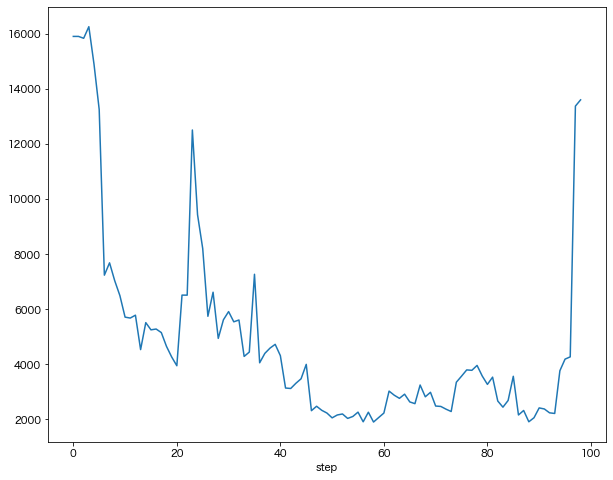

In [24]:

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(tr)
ax1.set_xlabel("step")
plt.show()